<h1 style = "font-size:3rem;color:orange">Extracting Time-Domain Audio Features</h1>

In [267]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import librosa                  
import librosa.display 
import IPython.display as ipd
import scipy

In [12]:
# import audio to analyse
data, sr = librosa.load('../samples/Trumpet.wav')

<h1 style = "font-size:3rem;color:orange">Amplitude Envelope</h1>
Extract highest value of frame

In [116]:
def amplitude_envelope(data, frame_size):
    amplitude_envelope = np.zeros(len(data))
    for i in range(0, len(data), frame_size):
        current_frame_amplitude_envelope= max(data[i:i+frame_size])
        amplitude_envelope[i:i+frame_size] = current_frame_amplitude_envelope  
        
    return np.array(amplitude_envelope)

In [171]:
data_length = len(data)
frame_size = [512, 1024, 2048]
envelope = np.zeros((len(frame_size), data_length))

for i in range(0, len(frame_size)):
    envelope[i] = amplitude_envelope(data, frame_size[i])


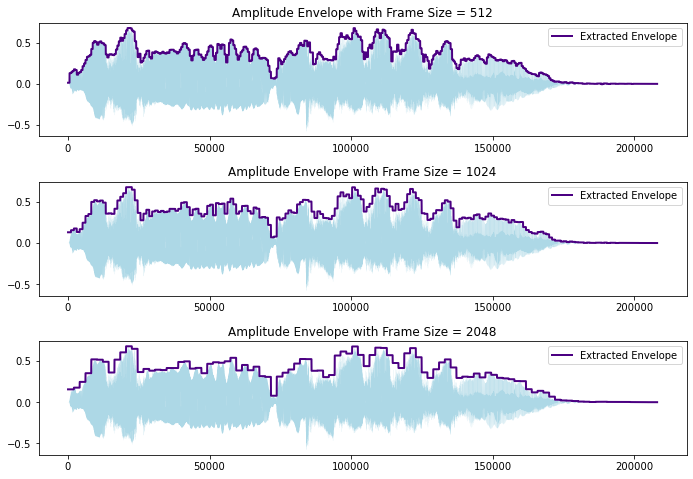

In [172]:
plt.figure(figsize=(10, 6))
for i in range(0, len(frame_size)):
    plt.subplot(len(frame_size), 1, i+1)
    plt.plot(data, lw = 0.08, color = 'lightblue')
    plt.plot(envelope[i], lw = 2, color = 'indigo', label = 'Extracted Envelope')
    plt.title(f'Amplitude Envelope with Frame Size = {frame_size[i]}')
    plt.legend()
    plt.legend(loc='upper right')
plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=1, 
                    top=1, 
                    wspace=0.1, 
                    hspace=0.4)


<h1 style = "font-size:3rem;color:orange">Root Mean Square</h1>
RMS is the mean of the sum of the energy

In [290]:
def root_mean_square(data, frame_size, hop_size):
    root_mean_square = np.zeros(len(data))
    
    for i in range(0, len(data) - frame_size, int(hop_size * frame_size)):
        data_sum_squared = 0
        for n in range(i,i+frame_size):
            data_sum_squared += data[n]*data[n]
        root_mean_square[i:i+frame_size] = np.sqrt(data_sum_squared / frame_size)
    return root_mean_square

In [291]:
data_length = len(data)
frame_size = [128, 512, 1024]
hop_size = [1, 0.8, 0.5]
rms = np.zeros((len(frame_size) * len(frame_size), data_length))

idx = 0
for i in range(0, len(frame_size)):
    for l in range(0, len(hop_size)):
        rms[idx] = root_mean_square(data, frame_size[i], hop_size[l])
        idx+=1

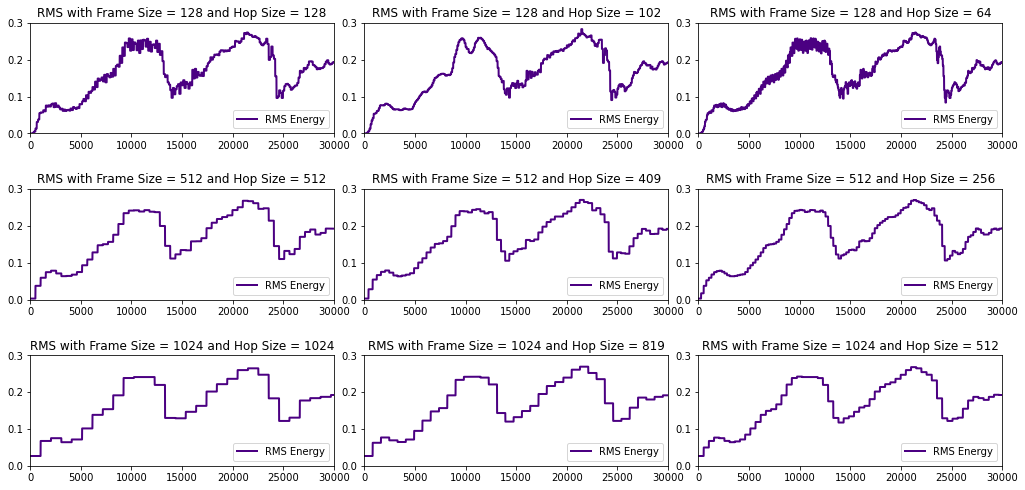

In [322]:
ax = plt.figure(figsize=(15, 10))
idx = 0

for i in range(0, len(frame_size)):
    for l in range(0, len(hop_size)):
        plt.subplot(len(frame_size) * len(hop_size), 3, idx+1)
        plt.axis([0, 30000, 0, 0.3])
        #plt.plot(data[0:70000], lw = 0.08, color = 'lightblue')
        plt.plot(rms[idx], lw = 2, color = 'indigo', label = 'RMS Energy')
        plt.title(f'RMS with Frame Size = {frame_size[i]} and Hop Size = {int(hop_size[l] * frame_size[i])}')
        
        plt.legend()
        plt.legend(loc='lower right')

        idx += 1 
plt.subplots_adjust(left=0.1,
                    bottom=0, 
                    right=1, 
                    top=2, 
                    wspace=0.1, 
                    hspace=0.5)